# Solow model with human capital

I simulate the Solow model with human capital

In [43]:
import numpy as np
from scipy import optimize
import ipywidgets as widgets
import matplotlib.pyplot as plt
import sympy as sm
from sympy import *

import ny_modelproject_wilhelm as ny

plt.style.use('seaborn-whitegrid')


%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# Setup

The Solow Model with human capital consists of the following fice equations.

**Time:** Discrete and indexed by $t\in\{0,1,\dots\}$.

**Demographics:** Population of size $L_t$ that grow with the rate $n$ in each period:

$$L_{t+1} = (1+n)L_{t}$$

Households supply labur $L_t$ exogenously and independant of wages.

**Households**: Households decide how much to save in order to buy both capital and human capital:
$$S_t = (s_K + s_H)Y_t$$
Consumption is income, $Y_t$ minus savings, $S_t$:
$$C_t = Y_t - S_t = (1 - s_K - s_H)Y_t$$


**Production:** Firms produce with a cobb douglas function. They use capital, $K_t$; labour, $L_t$; technology, $A_t$ and human capital, $H_t$.

$$Y_{t} = K_{t}^\alpha H_{t}^\phi (A_{t}L_{t})^{1-\alpha-\phi}$$

Capital and human capital accumulates at the saving rats and depreciates at the depreciation rate, $\delta$, which is exogenously given:
$$K_{t+1} = s_{K}Y_{t}+(1-\delta)K_{t}$$
$$H_{t+1} = s_{H}Y_{t}+(1-\delta)H_{t}$$

**Technology:** Technology accumulates at the rate, $g$.
$$A_{t+1} = (1+g)A_t$$

# Analytical solution

I cannot write $\tilde{k}_{t+1}$ in sympy, so i have to solve the model without. 

**The transistion equation**

We can find the transistion equation for kapital and human capital:

$$ \tilde{k}_{t+1} = \frac{1}{(1+n)(1+g)}(s_K \tilde{k}_t^\alpha \tilde{h}_t^\phi + (1-\delta)\tilde{k}_t$$
$$ \tilde{h}_{t+1} = \frac{1}{(1+n)(1+g)}(s_H \tilde{k}_t^\alpha \tilde{h}_t^\phi + (1-\delta)\tilde{h}_t$$

**The Solow equation**

By substracting capital and human capital in period t, we get the solow equations:
$$ \tilde{k}_{t+1} - \tilde{k}_{t} = \frac{1}{(1+n)(1+g)}(s_K \tilde{k}_t^\alpha \tilde{h}_t^\phi - (n + g + \delta + ng)\tilde{k}_t$$
$$ \tilde{h}_{t+1} - \tilde{h}_{t} = \frac{1}{(1+n)(1+g)}(s_H \tilde{k}_t^\alpha \tilde{h}_t^\phi - (n + g + \delta + ng)\tilde{h}_t$$

**Steady state**

In steady state, the change in capital and human capital is zero: 

$$ 0 = \frac{1}{(1+n)(1+g)}(s_K \tilde{k}_t^\alpha \tilde{h}_t^\phi - (n + g + \delta + ng)\tilde{k}_t$$
$$ 0 = \frac{1}{(1+n)(1+g)}(s_H \tilde{k}_t^\alpha \tilde{h}_t^\phi - (n + g + \delta + ng)\tilde{h}_t$$

Here we have two equations with two unknowns. This is easy to solve with math and yieds: 

$$ \tilde{k}^* = \frac{s_K^{1-\phi}s_H^\phi}{n+g+\delta+ng}^\frac{1}{1-\alpha-\phi}$$
$$ \tilde{h}^* = \frac{s_K^{\alpha}s_H^{1-\alpha}}{n+g+\delta+ng}^\frac{1}{1-\alpha-\phi}$$

Income is then: 

$$\tilde{y}^* = (\tilde{k}^*)^\alpha (\tilde{h}^*)^\alpha$$
$$= \frac{s_K}{n+g+\delta+ng}^\frac{\alpha}{1-\alpha-\phi} \frac{s_H}{n+g+\delta+ng}^\frac{\phi}{1-\alpha-\phi}$$

# Nummerical solution

In [44]:
#Plausible values for the parameters
alpha = 1/3
phi = 1/3
n = 0.02
g = 0.02
s_k = 0.4
s_h = 0.4
delta = 0.02

In [45]:
#We define a function containing our h- and k-functions as well as vectors in place of the endogenous variables
object = lambda x: [ny.k_solow_equation(x[1], x[0], alpha, phi, n, g, s_k, s_h, delta),
                    ny.h_solow_equation(x[1], x[0], alpha, phi, n, g, s_k, s_h, delta)]

In [50]:
#We solve the vector functions
sol = optimize.root(object, [100, 100], method='broyden1')

In [47]:
sol.x

array([290.44850176, 290.44850176])

# Phase diagram

In [48]:
k_vec, h_vec_k, h_vec_h=ny.solve(alpha, phi, n, g, s_k, s_h, delta)

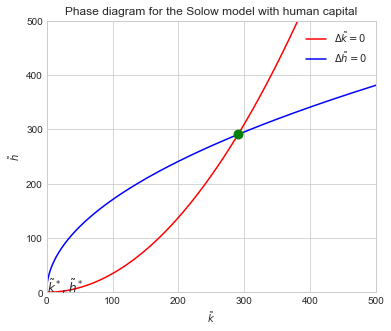

In [49]:
fig = plt.figure(figsize=(13, 5))
ax = fig.add_subplot(1, 2, 1)
ax.plot(h_vec_k, k_vec, label=r'$\Delta \tilde{k}=0$', color='red')
ax.plot(k_vec, h_vec_k, label=r'$\Delta \tilde{h}=0$', color='blue')
ax.set_ylabel(r'$\tilde{h}$')
ax.set_xlabel(r'$\tilde{k}$')
ax.legend()  

# mark steady state
plt.scatter(sol.x[1],sol.x[0], color='green', s=80,zorder=2.5)

# axes setup
ax.text(0.07, 0.07, r'$\tilde{k}^*, \tilde{h}^*$', fontsize=12)
ax.set(xlim=(0, 500), ylim=(0, 500))
ax.set_title('Phase diagram for the Solow model with human capital');